## Тестовое на продуктового аналитика

Цель задания: рассмотреть продуктовые метрики в обучающем игровом приложении.

Входные данные – данные об активности пользователей:
- данные о регистрации пользователей;
- лог сервера с данными о посещениях;
- выгрузка их покупок за этот период;
- данные об уровнях.

1. [Общая информация](#start)
    * [Таблица users](#users)
    * [Таблица sessions](#sessions)
    * [Таблица payments](#payments)
    * [Таблица levels](#levels)
2. [Исследовательский анализ данных](#analiz)
    * [Retention rate](#rr)
    * [Время, которое ученики проводят в приложении](#time) 
    * [Как ученики переходят с уровня на уровень](#level) 
    * [Метрики монетизации для всей когорты](#metricsm) 
    * [Уровень, на котором ученики совершают больше всего платежей](#most_amt) 
    * [Уровень, на котором ученики совершают первые платежи](#first_amt) 
3. [Выводы из рассчетов](#vivod)    
    * [Метрики для первоочередного отслеживания](#metrics_now)
    * [Метрики для дальнешего отслеживания](#metrics_future) 


##  1. Общая информация <a id="start"></a> 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import plotly.io as pio
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:\\Users\\stupe\\python\\тестовое\\"
users = pd.read_csv(path + 'users.csv', index_col=0)
sessions = pd.read_csv(path + 'sessions.csv', index_col=0)
payments = pd.read_csv(path + 'payments.csv', index_col=0)
levels = pd.read_csv(path + 'levels.csv', index_col=0)

### 1.1 Таблица users <a id="users"></a> 

In [3]:
users.head()

,user_id,reg_time
0,439127,2023-05-16 15:47:56.024
1,646681,2023-05-16 16:32:35.495
2,35136,2023-05-16 16:50:14.571
3,933255,2023-05-16 03:28:56.790
4,59440,2023-05-16 06:53:22.412


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31114 entries, 0 to 31114
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   31114 non-null  int64 
 1   reg_time  31114 non-null  object
dtypes: int64(1), object(1)
memory usage: 729.2+ KB


In [5]:
users['dt'] = pd.to_datetime(users['reg_time'], format = '%Y-%m-%d',errors = 'coerce').dt.normalize()

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31114 entries, 0 to 31114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   31114 non-null  int64         
 1   reg_time  31114 non-null  object        
 2   dt        31114 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 972.3+ KB


In [7]:
users.head()

,user_id,reg_time,dt
0,439127,2023-05-16 15:47:56.024,2023-05-16
1,646681,2023-05-16 16:32:35.495,2023-05-16
2,35136,2023-05-16 16:50:14.571,2023-05-16
3,933255,2023-05-16 03:28:56.790,2023-05-16
4,59440,2023-05-16 06:53:22.412,2023-05-16


In [8]:
users.duplicated().sum()

0

В таблице users отсутвуют дубликаты и пропуски в данных. В таблице два столбца: 'user_id' - id пользователя, 'reg_time' - время события. Столбец 'reg_time' приведен к типу datetime64.

### 1.2 Таблица sessions <a id="sessions"></a> 

In [9]:
sessions.head()

,user_id,close_time,open_time
0,875013,2023-05-16 05:17:59,2023-05-16 05:06:09
1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34
2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58
3,138278,2023-05-18 05:02:58,2023-05-18 04:51:06
4,138278,2023-05-19 05:58:32,2023-05-19 05:46:19


In [10]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358004 entries, 0 to 358033
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     358004 non-null  int64 
 1   close_time  358004 non-null  object
 2   open_time   358004 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.9+ MB


In [11]:
sessions['close_time'] = pd.to_datetime(sessions['close_time'])
sessions['open_time'] = pd.to_datetime(sessions['open_time'])

In [12]:
sessions.duplicated().sum()

0

В таблице sessions отсутвуют дубликаты и пропуски в данных. В таблице три столбца: 'user_id' - id пользователя, 'open_time' - время время начала сессии, 'close_time' - время время окончания сессии. Столбцы 'open_time' и 'close_time' приведены к типу datetime64.

### 1.3 Таблица payments <a id="payments"></a> 

In [13]:
payments.head()

,user_id,pay_time,amt
1,107907,2023-05-29 17:08:18.890,0.400218
2,510991,2023-05-20 16:55:01.216,0.199608
3,294837,2023-05-19 01:41:55.970,0.199608
4,644287,2023-05-20 03:01:53.697,0.199608
5,673424,2023-05-20 03:33:36.918,0.099302


In [14]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   699 non-null    int64  
 1   pay_time  699 non-null    object 
 2   amt       699 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.8+ KB


In [15]:
payments['pay_time'] = pd.to_datetime(payments['pay_time'], format='%Y-%m-%d')

In [16]:
payments.duplicated().sum()

0

В таблице payments отсутвуют дубликаты и пропуски в данных. В таблице три столбца: 'user_id' - id пользователя, 'pay_time' - время платежа, 'amt'  - сумма платежа. Столбец 'pay_time' приведен к типу datetime64.

### 1.4 Таблица levels <a id="levels"></a> 

In [17]:
levels.head()

,user_id,time,level
0,105194,2023-05-16 08:22:12.799003,2.0
1,105194,2023-05-16 08:26:42.405003,3.0
2,105194,2023-05-16 08:27:12.760003,4.0
3,991914,2023-05-16 09:06:38.315003,2.0
4,991914,2023-05-16 09:09:39.832003,3.0


In [18]:
levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130623 entries, 0 to 130629
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  130623 non-null  int64  
 1   time     130623 non-null  object 
 2   level    130623 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ MB


In [19]:
levels['time'] = pd.to_datetime(levels['time'])
levels['level'] = levels['level'].astype('int')

In [20]:
levels.duplicated().sum()

0

В таблице levels отсутвуют дубликаты и пропуски в данных. В таблице три столбца: 'user_id' - id пользователя, 'time' - время события, 'level' - номер полученного игроком уровня. Столбец 'time' приведен к типу datetime64.

##  2. Исследовательский анализ данных <a id="analiz"></a> 

### 2.1 Retention rate <a id="rr"></a> 

In [21]:
print(f'Минимальная дата исследуемого периода -  {users.reg_time.min()}, а максимальная - {sessions.open_time.max()}.')

Минимальная дата исследуемого периода -  2023-05-11 02:01:36.784, а максимальная - 2023-05-30 17:09:26.


In [22]:
result_raw = users.merge(
    sessions, on='user_id', how='left'
)
result_raw

,user_id,reg_time,dt,close_time,open_time
0,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-16 16:55:15,2023-05-16 15:47:56
1,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 02:52:27,2023-05-17 02:16:58
2,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 03:35:25,2023-05-17 03:18:01
3,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 04:40:43,2023-05-17 04:25:57
4,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 10:33:00,2023-05-17 10:22:22
...,...,...,...,...,...
358043,740216,2023-05-20 08:49:46.198,2023-05-20,2023-05-29 14:31:33,2023-05-29 14:24:10
358044,740216,2023-05-20 08:49:46.198,2023-05-20,2023-05-29 15:07:55,2023-05-29 14:54:39
358045,740216,2023-05-20 08:49:46.198,2023-05-20,2023-05-29 20:24:59,2023-05-29 20:22:48
358046,141306,2023-05-20 14:50:20.902,2023-05-20,2023-05-20 15:19:11,2023-05-20 14:50:20


In [23]:
# вычисляем лайфтайм для каждой сессии в днях

result_raw['lifetime'] = (
    result_raw['open_time'] - result_raw['dt']
).dt.days.fillna(0).astype('int')
print(result_raw['lifetime'].unique())
result_raw

[ 0  1  2  3  4  5  6  7  8  9 10 -1]


,user_id,reg_time,dt,close_time,open_time,lifetime
0,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-16 16:55:15,2023-05-16 15:47:56,0
1,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 02:52:27,2023-05-17 02:16:58,1
2,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 03:35:25,2023-05-17 03:18:01,1
3,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 04:40:43,2023-05-17 04:25:57,1
4,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 10:33:00,2023-05-17 10:22:22,1
...,...,...,...,...,...,...
358043,740216,2023-05-20 08:49:46.198,2023-05-20,2023-05-29 14:31:33,2023-05-29 14:24:10,9
358044,740216,2023-05-20 08:49:46.198,2023-05-20,2023-05-29 15:07:55,2023-05-29 14:54:39,9
358045,740216,2023-05-20 08:49:46.198,2023-05-20,2023-05-29 20:24:59,2023-05-29 20:22:48,9
358046,141306,2023-05-20 14:50:20.902,2023-05-20,2023-05-20 15:19:11,2023-05-20 14:50:20,0


In [24]:
print(result_raw.query('lifetime == -1'))
result_raw = result_raw.query('lifetime != -1')

       user_id                 reg_time         dt          close_time  \
28167   622739  2023-05-17 03:22:17.324 2023-05-17 2023-05-16 02:10:55   

                open_time  lifetime  
28167 2023-05-16 02:05:38        -1  


Есть один пользователь, у которого время регистрации на день позже времени первой сессии. Удалим его для удобства дальнейших рассчетов Retention rate.

In [25]:
result_raw['dt'] = pd.to_datetime(result_raw['dt']).dt.date

result_grouped = result_raw.pivot_table(
    index='dt', columns='lifetime', values='user_id', aggfunc='nunique'
) # строим таблицу удержания

result_grouped

lifetime,0,1,2,3,4,5,6,7,8,9,10
dt,,,,,,,,,,,
2023-05-11,348.0,157.0,128.0,105.0,92.0,79.0,83.0,84.0,73.0,65.0,20.0
2023-05-12,409.0,181.0,142.0,118.0,91.0,95.0,90.0,85.0,76.0,64.0,28.0
2023-05-13,550.0,224.0,169.0,148.0,130.0,114.0,111.0,99.0,99.0,89.0,33.0
2023-05-14,1204.0,370.0,261.0,242.0,211.0,198.0,191.0,190.0,150.0,143.0,54.0
2023-05-15,4016.0,1395.0,1031.0,874.0,756.0,703.0,652.0,610.0,575.0,547.0,298.0
2023-05-16,8332.0,2735.0,2003.0,1706.0,1521.0,1355.0,1265.0,1207.0,1181.0,1110.0,311.0
2023-05-17,7230.0,3424.0,2639.0,2258.0,2013.0,1852.0,1701.0,1661.0,1551.0,1459.0,520.0
2023-05-18,5472.0,2785.0,2200.0,1938.0,1694.0,1533.0,1450.0,1414.0,1351.0,1226.0,196.0
2023-05-19,1621.0,741.0,601.0,523.0,455.0,459.0,421.0,406.0,359.0,335.0,130.0


In [26]:
cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)
cohort_sizes

,cohort_size
dt,
2023-05-11,348
2023-05-12,409
2023-05-13,551
2023-05-14,1208
2023-05-15,4017
2023-05-16,8333
2023-05-17,7234
2023-05-18,5476
2023-05-19,1624


In [27]:
result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
).fillna(0)
result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10
dt,,,,,,,,,,,,
2023-05-11,348,348.0,157.0,128.0,105.0,92.0,79.0,83.0,84.0,73.0,65.0,20.0
2023-05-12,409,409.0,181.0,142.0,118.0,91.0,95.0,90.0,85.0,76.0,64.0,28.0
2023-05-13,551,550.0,224.0,169.0,148.0,130.0,114.0,111.0,99.0,99.0,89.0,33.0
2023-05-14,1208,1204.0,370.0,261.0,242.0,211.0,198.0,191.0,190.0,150.0,143.0,54.0
2023-05-15,4017,4016.0,1395.0,1031.0,874.0,756.0,703.0,652.0,610.0,575.0,547.0,298.0
2023-05-16,8333,8332.0,2735.0,2003.0,1706.0,1521.0,1355.0,1265.0,1207.0,1181.0,1110.0,311.0
2023-05-17,7234,7230.0,3424.0,2639.0,2258.0,2013.0,1852.0,1701.0,1661.0,1551.0,1459.0,520.0
2023-05-18,5476,5472.0,2785.0,2200.0,1938.0,1694.0,1533.0,1450.0,1414.0,1351.0,1226.0,196.0
2023-05-19,1624,1621.0,741.0,601.0,523.0,455.0,459.0,421.0,406.0,359.0,335.0,130.0


In [28]:
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
)
result_grouped['cohort_size'] = cohort_sizes
result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10
dt,,,,,,,,,,,,
2023-05-11,348,1.000000,0.451149,0.367816,0.301724,0.264368,0.227011,0.238506,0.241379,0.209770,0.186782,0.057471
2023-05-12,409,1.000000,0.442543,0.347188,0.288509,0.222494,0.232274,0.220049,0.207824,0.185819,0.156479,0.068460
2023-05-13,551,0.998185,0.406534,0.306715,0.268603,0.235935,0.206897,0.201452,0.179673,0.179673,0.161525,0.059891
2023-05-14,1208,0.996689,0.306291,0.216060,0.200331,0.174669,0.163907,0.158113,0.157285,0.124172,0.118377,0.044702
2023-05-15,4017,0.999751,0.347274,0.256659,0.217575,0.188200,0.175006,0.162310,0.151855,0.143142,0.136171,0.074185
2023-05-16,8333,0.999880,0.328213,0.240370,0.204728,0.182527,0.162607,0.151806,0.144846,0.141726,0.133205,0.037321
2023-05-17,7234,0.999447,0.473320,0.364805,0.312137,0.278269,0.256013,0.235140,0.229610,0.214404,0.201686,0.071883
2023-05-18,5476,0.999270,0.508583,0.401753,0.353908,0.309350,0.279949,0.264792,0.258218,0.246713,0.223886,0.035793
2023-05-19,1624,0.998153,0.456281,0.370074,0.322044,0.280172,0.282635,0.259236,0.250000,0.221059,0.206281,0.080049


Коэффициент удержания первого дня для некоторых когорт меньше 1,  это может говорить означать, что некоторые пользователи уходят сразу после регистрации, либо это может говорить о небольших технических сбоях. Таких пользователей крайне мало.

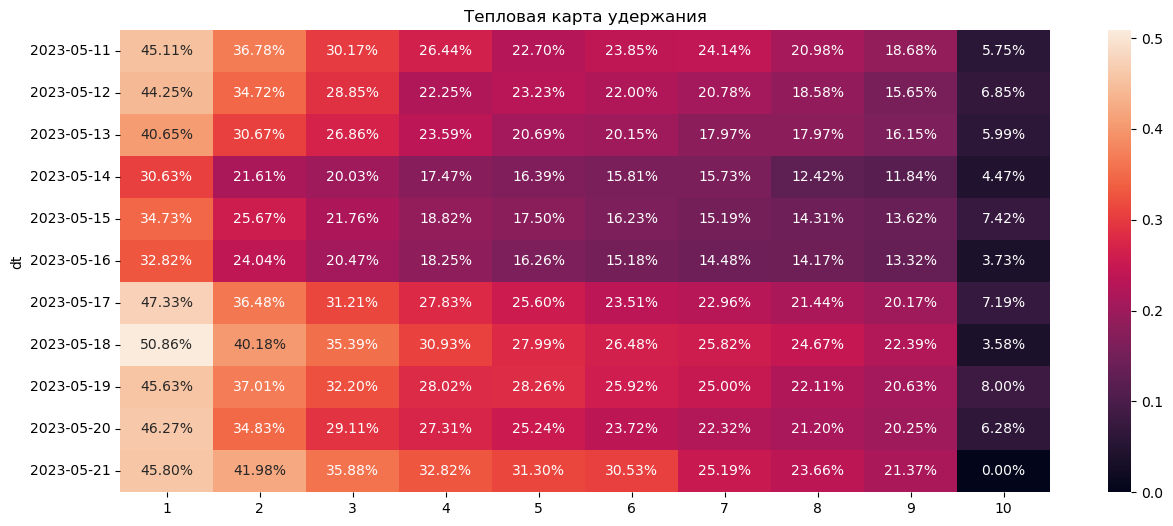

In [29]:
plt.figure(figsize=(15, 6))  
sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True, 
    fmt='.2%' # переводим значения в проценты

)



plt.title('Тепловая карта удержания')
plt.show()

Лучшее удержание в большинстве дней показали пользователи, привлечённые 18 мая. На 11 день результаты всех когорт сильно упали и почти сравнялись. Пользователи, привлеченные 21 мая показывают лучшее удержание с 4 по 7 день. На 10 день retenrtion rate для этой когорты равен нулю, так как у нас нет данных о событиях в этот день.  

### 2.2 Время, которое ученики проводят в приложении <a id="time"></a> 

In [30]:
result_raw['time_diff_sec'] = (result_raw['close_time'] - result_raw['open_time']).dt.seconds
print(f'Cреднее время, которое ученики проводят в приложении составляет {round(result_raw.time_diff_sec.mean())} секунду.')
print(f'Медианное время, которое ученики проводят в приложении составляет {round(result_raw.time_diff_sec.median())} секунд.')

Cреднее время, которое ученики проводят в приложении составляет 751 секунду.
Медианное время, которое ученики проводят в приложении составляет 419 секунд.


### 2.3 Как ученики переходят с уровня на уровень <a id="level"></a> 

In [31]:
levels_pivot = levels.pivot_table(index = 'level', values = 'user_id', aggfunc = 'nunique').reset_index()
levels_pivot.columns = ['level','count_of_users']
levels_pivot['share_of_users_%'] = round(levels_pivot['count_of_users']/levels_pivot['count_of_users'][0]*100,3)
levels_pivot['share_of_previous_level_%'] = round(levels_pivot['count_of_users'] / levels_pivot['count_of_users'].shift(1) * 100, 1)
levels_pivot

,level,count_of_users,share_of_users_%,share_of_previous_level_%
0,2,25534,100.000,NaN
1,3,21366,83.677,83.7
2,4,17862,69.954,83.6
3,5,14438,56.544,80.8
4,6,12729,49.851,88.2
5,7,12083,47.321,94.9
6,8,10327,40.444,85.5
7,9,6598,25.840,63.9
8,10,4034,15.799,61.1
9,11,2636,10.323,65.3


Больше всего пользователей теряется при переходе с 2 уровня на 3 - чуть боллее 16% процентов от общего числа. До 13 уровня доходит лишь 3,1% пользователей, а до последнего лишь 0.004 % (1 пользователь).

Лучшие результаты по процентному показателю количества пользователей от предыдущего уровня показывают пользователи перешедшие с 6 на 7 уровень, а худшие при переходе с 16 на 17. Так,на 7 уровень переходят 94.9% пользователей, получивших 6 уровень, а 17 уровень получают лишь 29.7% пользователей,получивших 16 уровень.

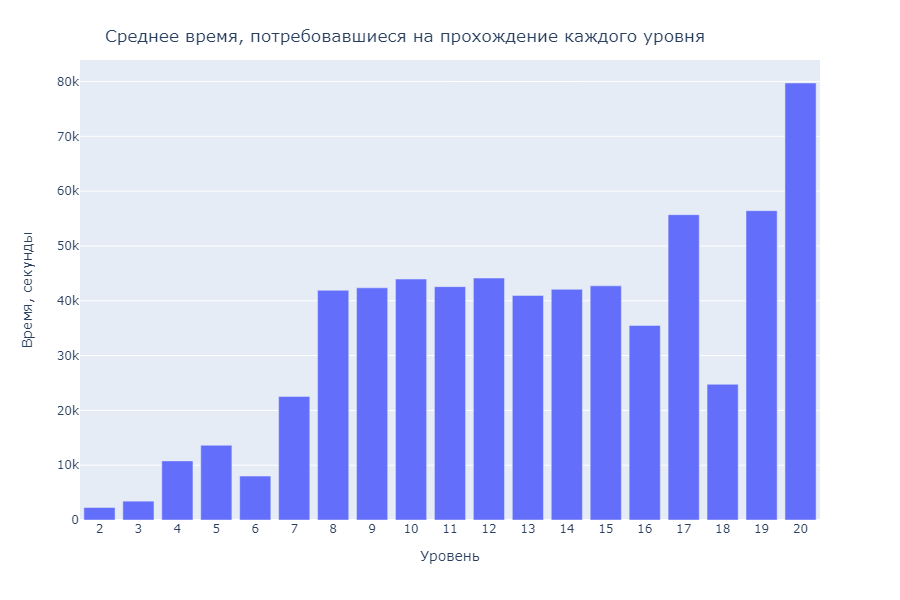

In [32]:
# Сортировка датафрейма по user_id и времени
levels_sorted = levels.sort_values(by=['user_id', 'time'])

# Добавление столбца, содержащего информацию о времени, прошедшем между открытием каждого уровня пользователем
levels_sorted['sec_to_complete'] = levels_sorted.groupby('user_id')['time'].diff().shift(-1).dt.seconds

# Группировка пользователей по среднему времени, потребовавшиеся на прохождение каждого уровня
mean_time_to_complete = round(levels_sorted.groupby('level')['sec_to_complete'].mean().reset_index())

mean_time_to_complete = mean_time_to_complete.query('level != 21')

fig = px.bar(mean_time_to_complete, x="level", y="sec_to_complete", height=400)

pio.renderers.default = 'png'
pio.write_image(fig, 'graph.png')

fig.update_layout(title={'text':'Cреднее время, потребовавшиеся на прохождение каждого уровня',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, 
                  height=600,
                  xaxis_title='Уровень',
                  yaxis_title='Время, секунды',
                  xaxis = {'tickvals': mean_time_to_complete['level']})
fig.show()

На графике не прослеживается ярко выражанной зависимости среднего затраченного времени на уровень от номера уровня. С 9 по 15 уровень среднее время прохождения уровня держится на примерно постоянном значении. Самым времязатратным уровнем является уровень номер 20, но необходимо поминить, что количество людей прошедших этот уровень равном 2, что не является репрезентативной выборкой.


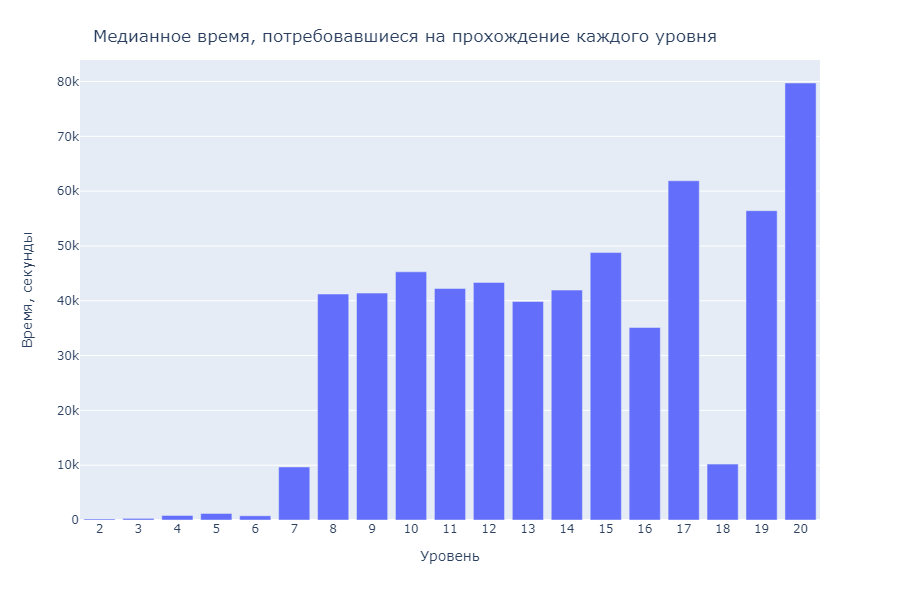

In [33]:
# Группировка пользователей по медианному времени, потребовавшиеся на прохождение каждого уровня
median_time_to_complete = levels_sorted.groupby('level')['sec_to_complete'].median().reset_index()
median_time_to_complete = median_time_to_complete.query('level != 21')

fig = px.bar(median_time_to_complete, x="level", y="sec_to_complete", height=400)

                  
fig.update_layout(title={'text':'Медианное время, потребовавшиеся на прохождение каждого уровня',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, 
                  height=600,
                  xaxis_title='Уровень',
                  yaxis_title='Время, секунды',
                  xaxis = {'tickvals': median_time_to_complete['level']})

fig.show()

Медианное время прохождения 2, 3, 4, 5, 6 уровней более чем в 10 раз отличается от среднего времени прохождения этих же уровней. В остальном, распределение медианного времени, потребовавшегося на прохождение каждого уровня, примерно совпадает с распеделением среднего времени.

### 2.4 Метрики монетизации для всей когорты <a id="metricsm"></a> 

In [34]:
arppu = payments['amt'].sum()/payments['user_id'].nunique() 
print(f'ARPPU всей когорты равен {round(arppu,2)}')

ARPPU всей когорты равен 1.61


In [35]:
payments_merged = users.merge(
    payments, on='user_id', how='left'
)
arpu = payments_merged['amt'].sum()/payments_merged['user_id'].nunique() 
print(f'ARPU всей когорты равен {round(arpu,2)}')
print(f'ARPPU больше ARPU в {round(arppu/arpu)} раз')

ARPU всей когорты равен 0.02
ARPPU больше ARPU в 100 раз


Такая большая разница между ARPPU и ARPU может указывать на то, что приложение имеет сильную монетизацию и дополнительные возможности заработка с пользователей, которые уже готовы тратить деньги на услуги. Однако, это также может указывать на то, что неплатящие пользователи не используют продукт слишком активно и не представляют существенной ценности для бизнеса.

### 2.5 Уровень, на котором ученики совершают больше всего платежей <a id="most_amt"></a> 

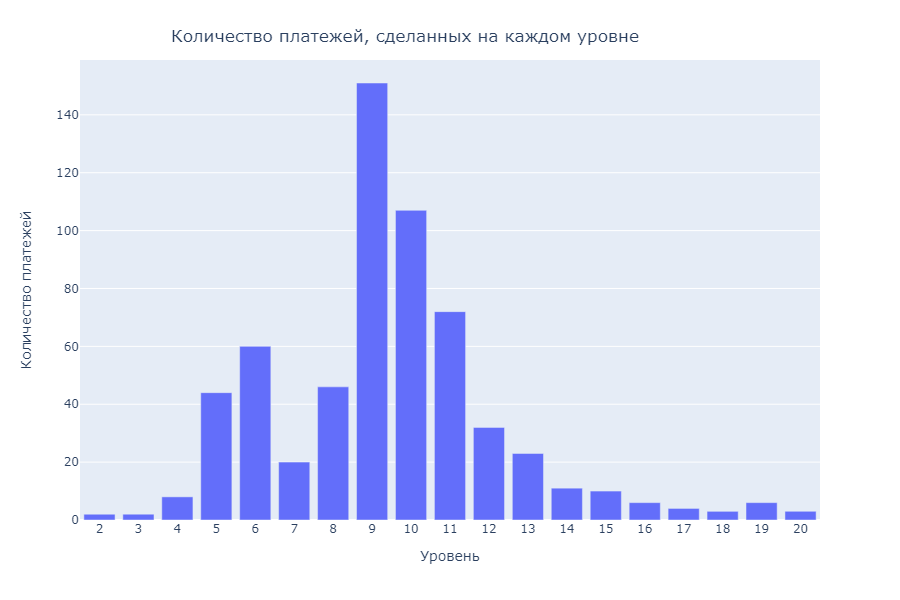

In [36]:
levels = levels.sort_values('time')
payments = payments.sort_values('pay_time')

# Объединяем таблицы по ближайшему значению времени
merged = pd.merge_asof(payments, levels, left_on='pay_time', right_on='time', by='user_id', direction='forward')

# Удаляем лишние столбцы и сохраняем результат
result = merged.drop('time', axis=1)


# Группируем результат, чтобы узнать уровнеь с самым большим количестовом платежей и суммой платежей на этом уровне
top_levels_by_amt = (result.groupby('level').agg({'amt': ['count', 'sum']})\
                     .reset_index().sort_values(by = ('amt', 'count'), ascending = False))
top_levels_by_amt.columns = ['level','count', 'sum']

fig = px.bar(top_levels_by_amt, x="level", y= 'count', height=400)

                  
fig.update_layout(title={'text':'Количество платежей, сделанных на каждом уровне',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, 
                  height=600,
                  xaxis_title='Уровень',
                  yaxis_title='Количество платежей',
                  xaxis = {'tickvals': top_levels_by_amt['level']})

fig.show()

Тройкой лидеров по количеству платжей являются 9, 10, 11 уровни. На них было соверешено 151, 107, 72 платежа соответственно.

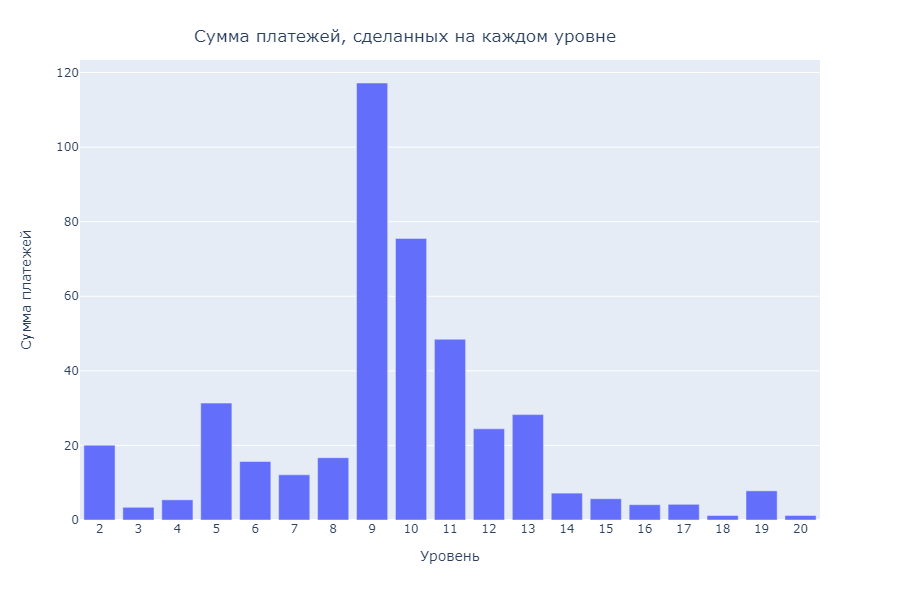

In [37]:
fig = px.bar(top_levels_by_amt, x="level", y= 'sum', height=400)

                  
fig.update_layout(title={'text':'Сумма платежей, сделанных на каждом уровне',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, 
                  height=600,
                  xaxis_title='Уровень',
                  yaxis_title='Сумма платежей',
                  xaxis = {'tickvals': top_levels_by_amt['level']})

fig.show()


Тройкой лидеров по сумме платжей являются 9, 10, 11 уровни. На них было соверешено платежей на сумму 117, 76, 48 условных единиц соответственно. Также, стоит обратить внимание на сумму платежей сделанных на втором уровне: она составляет 20 условных единиц, при количестве платежей равном двум. Этот факт говорит о крупном единоразовом влиянии средств.

### 2.6 Уровень, на котором ученики совершают первые платежи <a id="first_amt"></a> 

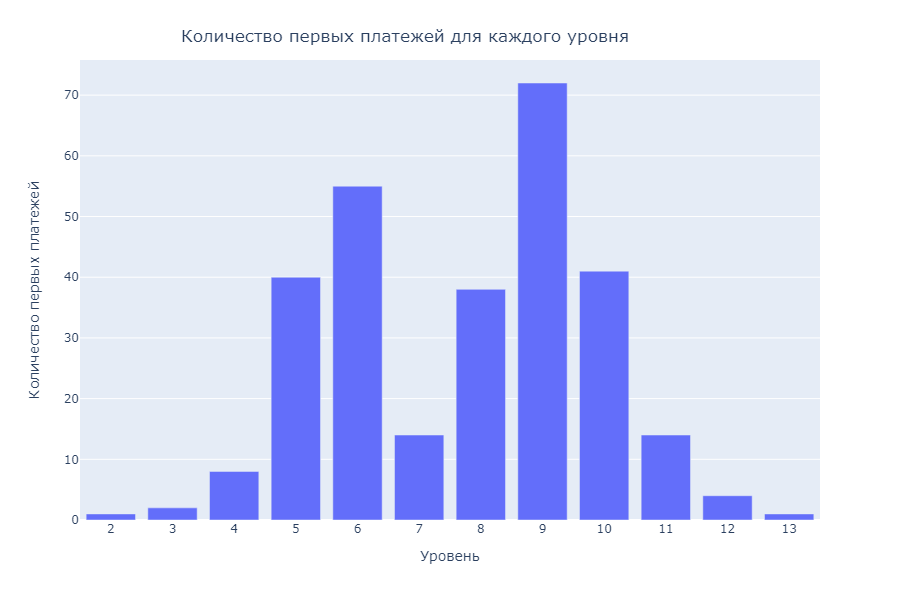

In [38]:
# Добавляю столбец is_first, который принимает значение True если это первый платеж пользователя, False-все остальные
result['is_first'] = ~result['user_id'].duplicated()

top_levels_by_first_amt = (result.groupby('level')['is_first'].sum()\
                                                            .reset_index()
                                                            .sort_values(by = 'is_first', ascending = False))
top_levels_by_first_amt = top_levels_by_first_amt.query('is_first != 0')
fig = px.bar(top_levels_by_first_amt, x="level", y= 'is_first', height=400)

                  
fig.update_layout(title={'text':'Количество первых платежей для каждого уровня',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, 
                  height=600,
                  xaxis_title='Уровень',
                  yaxis_title='Количество первых платежей',
                  xaxis = {'tickvals': top_levels_by_amt['level']})

fig.show()

Тройкой лидеров по количеству первых платжей являются 9, 6, 10 уровни. На них было соверешено 72, 55, 41 платеж соответственно.

##  3. Выводы из рассчетов <a id="vivod"></a> 

###  3.1 Метрики для первоочередного отслеживания. <a id="metrics_now"></a> 

Метриками, которые следует отслеживать в первую очередь, я бы принял - Retention Rate на 11 день, ARPU, Сумму платежей, сделанных на каждом уровне по следующим причинам:
- Retention Rate на 11 день сильно падает, что может говорить о падении интереса пользователей к этому дню. Возможно, к этому времени прохождение уровней начинает затруднять пользователей.
- ARPU довольно низок, что может говорить о проблемах с монетизацией и/или с привлечением клиентов.
- Суммы платежей, сделанных на каждом уровне достаточно неравномерна, и, на высоких уровнях пользователи неохотно совершают покупки.

###  3.2 Метрики для дальнешего отслеживания. <a id="metrics_future"></a> 

Я бы предложил компании произвести инвестиции в маркетинг и начать отслеживать CAC и ROI.

Customer Acquisition (CAC) - это метрика, которая определяет, сколько денег затрачивается на привлечение одного клиента. Для расчета CAC необходимо знать сумму затрат на маркетинг и рекламу, а также количество новых клиентов, привлеченных в рамках каждой рекламной кампании.

ROI (Return on Investment) - это показатель доходности инвестиций. Для расчета ROI необходимо знать размер инвестиций, а также сумму прибыли, которую эти инвестиции принесли.

Также стоит собирать дополнительную инфомацию о устройствах, с которых пользователи взаимодействуют с приложением, и о регионах нахождения пользователей. Эти данные позволят произвести дополнительный анализ для нахождений узких мест приложения.